In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection

from sklearn.metrics import precision_score, recall_score, roc_curve

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
#cvd_df = pd.read_csv('../data/cvd_data_features.csv')

In [3]:
cvd_df = pd.read_csv('../data/cvd_data_encoded.csv')

In [4]:
cvd_df.head().T

,0,1,2,3,4
gender,1.0,0.00,0.00,0.00,1.00
age,44.0,70.00,73.00,79.00,59.00
sysbp,144.0,138.00,130.00,144.00,136.00
diabp,74.0,60.00,68.00,74.00,76.00
bmi,30.9,24.74,30.63,28.93,29.51
waistcircum,96.0,96.50,117.10,107.70,101.20
hdl,39.0,59.00,49.00,81.00,76.00
trigly,86.0,65.00,195.00,50.00,123.00
ldl,49.0,75.00,98.00,90.00,104.00
totchol,105.0,147.00,186.00,181.00,205.00


In [5]:
cvd_df.columns

Index(['gender', 'age', 'sysbp', 'diabp', 'bmi', 'waistcircum', 'hdl',
       'trigly', 'ldl', 'totchol', 'CVD_risk', 'pulse_cat', 'hypertension_cat',
       'waistcircum_cat', 'hdl_cat', 'trigly_cat', 'ldl_cat', 'totchol_cat',
       'diabetes_cat', 'kidney_cat', 'family_history_cat', 'smoking_cat',
       'gender_cat_Female', 'gender_cat_Male', 'age_cat_20s', 'age_cat_30s',
       'age_cat_40s', 'age_cat_50s', 'age_cat_60s', 'age_cat_70s & above',
       'ethnicity_cat_Black', 'ethnicity_cat_Hispanic',
       'ethnicity_cat_Mexican', 'ethnicity_cat_Other', 'ethnicity_cat_White',
       'income_cat_lower middle', 'income_cat_lowest',
       'income_cat_middle & over', 'bmi_cat_underweight', 'bmi_cat_ideal',
       'bmi_cat_overweight'],
      dtype='object')

In [6]:
threshold = 0.6

corr_matrix = cvd_df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] >= threshold)]

print(f'There are {len(to_drop)} columns to drop with correlation > {threshold}')

There are 12 columns to drop with correlation > 0.6


In [7]:
to_drop

['waistcircum',
 'totchol',
 'hypertension_cat',
 'waistcircum_cat',
 'hdl_cat',
 'trigly_cat',
 'ldl_cat',
 'totchol_cat',
 'gender_cat_Female',
 'gender_cat_Male',
 'income_cat_lowest',
 'bmi_cat_overweight']

In [8]:
cvd_df.columns

Index(['gender', 'age', 'sysbp', 'diabp', 'bmi', 'waistcircum', 'hdl',
       'trigly', 'ldl', 'totchol', 'CVD_risk', 'pulse_cat', 'hypertension_cat',
       'waistcircum_cat', 'hdl_cat', 'trigly_cat', 'ldl_cat', 'totchol_cat',
       'diabetes_cat', 'kidney_cat', 'family_history_cat', 'smoking_cat',
       'gender_cat_Female', 'gender_cat_Male', 'age_cat_20s', 'age_cat_30s',
       'age_cat_40s', 'age_cat_50s', 'age_cat_60s', 'age_cat_70s & above',
       'ethnicity_cat_Black', 'ethnicity_cat_Hispanic',
       'ethnicity_cat_Mexican', 'ethnicity_cat_Other', 'ethnicity_cat_White',
       'income_cat_lower middle', 'income_cat_lowest',
       'income_cat_middle & over', 'bmi_cat_underweight', 'bmi_cat_ideal',
       'bmi_cat_overweight'],
      dtype='object')

In [9]:
X = cvd_df.drop(['CVD_risk', 'waistcircum', 'totchol','hypertension_cat',
                          'hdl_cat', 'trigly_cat', 'ldl_cat', 'totchol_cat',
                          'gender_cat_Female', 'gender_cat_Male', 'bmi_cat_underweight',
                          'bmi_cat_ideal', 'bmi_cat_overweight' ] , axis=1)
y = cvd_df['CVD_risk']

In [10]:
X.head()

,gender,age,sysbp,diabp,bmi,hdl,trigly,ldl,pulse_cat,waistcircum_cat,...,age_cat_60s,age_cat_70s & above,ethnicity_cat_Black,ethnicity_cat_Hispanic,ethnicity_cat_Mexican,ethnicity_cat_Other,ethnicity_cat_White,income_cat_lower middle,income_cat_lowest,income_cat_middle & over
0,1,44,144,74,30.90,39,86,49,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,70,138,60,24.74,59,65,75,0,1,...,0,1,0,0,0,0,1,0,0,1
2,0,73,130,68,30.63,49,195,98,0,1,...,0,1,0,0,0,0,1,1,0,0
3,0,79,144,74,28.93,81,50,90,0,1,...,0,1,0,0,0,0,1,0,1,0
4,1,59,136,76,29.51,76,123,104,0,0,...,0,0,1,0,0,0,0,1,0,0


In [11]:
X_tr, X_te, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
X_tr, X_va, y_train, y_val = train_test_split(X_tr, y_train, test_size=0.25, random_state=123)

In [12]:
print('Percent heldout for training:', round(100*(len(X_tr)/len(cvd_df)),0),'%')
print('Percent heldout for validation', round(100*(len(X_va)/len(cvd_df)),0),'%')
print('Percent heldout for testing:', round(100*(len(X_te)/len(cvd_df)),0),'%')

Percent heldout for training: 60.0 %
Percent heldout for validation 20.0 %
Percent heldout for testing: 20.0 %


In [13]:
print('Percent heldout for training:', round(100*(len(y_train)/len(cvd_df)),0),'%')
print('Percent heldout for validation', round(100*(len(y_val)/len(cvd_df)),0),'%')
print('Percent heldout for testing:', round(100*(len(y_test)/len(cvd_df)),0),'%')

Percent heldout for training: 60.0 %
Percent heldout for validation 20.0 %
Percent heldout for testing: 20.0 %


In [14]:
X.columns

Index(['gender', 'age', 'sysbp', 'diabp', 'bmi', 'hdl', 'trigly', 'ldl',
       'pulse_cat', 'waistcircum_cat', 'diabetes_cat', 'kidney_cat',
       'family_history_cat', 'smoking_cat', 'age_cat_20s', 'age_cat_30s',
       'age_cat_40s', 'age_cat_50s', 'age_cat_60s', 'age_cat_70s & above',
       'ethnicity_cat_Black', 'ethnicity_cat_Hispanic',
       'ethnicity_cat_Mexican', 'ethnicity_cat_Other', 'ethnicity_cat_White',
       'income_cat_lower middle', 'income_cat_lowest',
       'income_cat_middle & over'],
      dtype='object')

In [15]:
to_scale = ['age', 'sysbp', 'diabp', 'bmi', 'hdl', 'trigly','ldl']
not_to_scale = ['gender', 'pulse_cat', 'waistcircum_cat', 'diabetes_cat', 'kidney_cat',
                'family_history_cat', 'smoking_cat', 'age_cat_20s', 'age_cat_30s',
                'age_cat_40s', 'age_cat_50s', 'age_cat_60s', 'age_cat_70s & above',
                'ethnicity_cat_Black', 'ethnicity_cat_Hispanic', 'ethnicity_cat_Mexican',
                'ethnicity_cat_Other', 'ethnicity_cat_White','income_cat_lower middle',
                'income_cat_lowest', 'income_cat_middle & over']

In [16]:
scaler = StandardScaler()
scaled_train = pd.DataFrame(scaler.fit_transform(X_tr[to_scale]),columns=X_tr[to_scale].columns).reset_index(drop=True)
X_train=pd.concat([scaled_train, X_tr[not_to_scale].reset_index(drop=True)], axis=1)

In [17]:
scaled_val = pd.DataFrame(scaler.transform(X_va[to_scale]),columns=X_va[to_scale].columns).reset_index(drop=True)
X_val=pd.concat([scaled_val, X_va[not_to_scale].reset_index(drop=True)], axis=1)

In [18]:
scaled_test = pd.DataFrame(scaler.transform(X_te[to_scale]),columns=X_te[to_scale].columns).reset_index(drop=True)
X_test=pd.concat([scaled_test, X_te[not_to_scale].reset_index(drop=True)], axis=1)

In [19]:
X_train.head()

,age,sysbp,diabp,bmi,hdl,trigly,ldl,gender,pulse_cat,waistcircum_cat,...,age_cat_60s,age_cat_70s & above,ethnicity_cat_Black,ethnicity_cat_Hispanic,ethnicity_cat_Mexican,ethnicity_cat_Other,ethnicity_cat_White,income_cat_lower middle,income_cat_lowest,income_cat_middle & over
0,-1.491921,-0.751932,-0.750008,1.086766,-0.842354,-0.232706,0.936988,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,1.516454,-0.306587,-0.100995,0.830579,1.022038,-0.395660,1.441285,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,-1.547632,-0.529260,-0.425502,-0.298973,-0.283037,2.078267,-0.744002,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.934815,-0.417924,1.197030,0.051829,-0.780208,1.293129,1.665417,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,-1.659053,-1.531285,-1.074514,-1.520228,0.897745,-0.899333,-0.912101,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
X_val.head()

,age,sysbp,diabp,bmi,hdl,trigly,ldl,gender,pulse_cat,waistcircum_cat,...,age_cat_60s,age_cat_70s & above,ethnicity_cat_Black,ethnicity_cat_Hispanic,ethnicity_cat_Mexican,ethnicity_cat_Other,ethnicity_cat_White,income_cat_lower middle,income_cat_lowest,income_cat_middle & over
0,1.460743,-0.195251,0.061258,1.027086,-0.780208,1.115361,-0.267722,1,0,1,...,0,1,0,0,0,0,1,1,0,0
1,-0.266287,0.138757,1.034777,0.022716,-1.153086,0.374665,2.113681,0,0,1,...,0,0,0,0,0,0,1,1,0,0
2,0.179398,-0.751932,0.710270,2.495794,-0.655915,-0.766008,-0.015573,1,0,1,...,0,0,0,0,0,0,1,0,1,0
3,-0.767683,-1.753957,-1.723527,-0.792424,0.959891,-1.165984,-1.192266,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,-1.269079,0.250093,-0.425502,-0.521681,-0.904501,1.144989,1.077071,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [21]:
X_test.head()

,age,sysbp,diabp,bmi,hdl,trigly,ldl,gender,pulse_cat,waistcircum_cat,...,age_cat_60s,age_cat_70s & above,ethnicity_cat_Black,ethnicity_cat_Hispanic,ethnicity_cat_Mexican,ethnicity_cat_Other,ethnicity_cat_White,income_cat_lower middle,income_cat_lowest,income_cat_middle & over
0,1.516454,2.588152,0.385764,-1.288786,-0.283037,0.641316,0.516741,1,0,0,...,0,1,0,0,0,0,1,0,1,0
1,-1.213368,-0.640596,0.710270,-1.568263,2.389259,-0.958589,-0.659953,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,-0.823393,-0.306587,-0.263248,0.997974,-0.158744,-0.766008,0.012444,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0.847926,1.474791,0.548017,-1.365934,-0.966647,1.159803,0.488724,0,0,1,...,1,0,0,0,0,1,0,1,0,0
4,-1.603342,-0.195251,-1.885780,-0.486746,-0.718062,3.026359,-0.687969,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [22]:
naive_guess = np.random.binomial(1, p=np.mean(y), size=len(y_val))
naive_guess[:10], naive_guess.sum()

(array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0]), 323)

In [23]:
from sklearn.metrics import (roc_auc_score, precision_score,
                             recall_score, f1_score)

print('Naive Baseline\n')
roc = roc_auc_score(y_val, np.repeat(np.mean(y), len(y_val)))
print(f'ROC AUC: {round(roc, 4)}')

for metric in [precision_score, recall_score, f1_score]:
    print(f'{metric.__name__}: {round(metric(y_val, naive_guess), 4)}')

Naive Baseline

ROC AUC: 0.5
precision_score: 0.1269
recall_score: 0.1306
f1_score: 0.1287


In [24]:
print('The percentage of patients with CVD risk in training data:', round(100 * round(np.mean(y), 4)),'%')

The percentage of patients with CVD risk in training data: 11 %


In [25]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score,average_precision_score,precision_recall_curve
def model_fit(alg, X_train, X_val, y_train, y_val, plot=True):
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    y_train_pred = alg.predict(X_train)
    y_train_predprob = alg.predict_proba(X_train)[:,1]
    
    y_val_pred = alg.predict(X_val)
    y_val_predprob = alg.predict_proba(X_val)[:,1]
    
    prf_train=precision_recall_fscore_support(y_train, y_train_pred, pos_label =1, average ='binary')
    prf_val=precision_recall_fscore_support(y_val, y_val_pred, pos_label =1, average ='binary')
    area_prc_train=average_precision_score(y_train, y_train_predprob, average=None)
    area_prc_val=average_precision_score(y_val, y_val_predprob, average=None)
    
    
    precision_train, recall_train, thr_train = precision_recall_curve(y_train, y_train_predprob, pos_label =1)
    precision_val, recall_val, thr_val = precision_recall_curve(y_val, y_val_predprob, pos_label =1)
    
    print ("Model report on training data:")
    print ("Train: Precision: %.4f" %(prf_train[0]))
    print ("Train: Recall : %.4f" %(prf_train[1]))
    print ("Average Precision (Train): %.4f" %(area_prc_train))
    print('Train Accuracy: %.4f' %(accuracy_score(alg.predict(X_train),y_train)))
    print ("\nModel report on validation data:")
    print ("Test: Precision: %.4f" %(prf_val[0]))
    print ("Test: Recall : %.4f" %(prf_val[1]))
    print ("Average Precision (Validation): %.4f" % (area_prc_val))
    print('Validation Accuracy: %0.4f' %(accuracy_score(alg.predict(X_val),y_val)))
    
    if plot:
        plt.figure(figsize=(10,6))
        plt.plot(recall_val, precision_val, color='coral',label=' Validation PR-Curve')
        plt.plot(recall_train, precision_train, color='green',label=' Train PR-Curve')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall', fontsize=14)
        plt.ylabel('Precision', fontsize=14)
        plt.title('Precision-Recall Curve')
        plt.legend(loc="lower left")
        plt.show()

In [26]:
def plot_results(targets,predictions,title,schema='a'):
    
    fig, ax = plt.subplots(1,1,figsize=(6,4))
    tn, fp, fn, tp = confusion_matrix(targets,predictions).ravel()

    n_precision = tn/(tn+fn)
    n_recall = tn/(tn+fp)
        
    p_precision = tp/(tp+fp)
    p_recall = tp/(tp+fn)

    precision = [n_precision, p_precision]
    recall = [n_recall, p_recall]
    
    if schema == 'a':
        color1 = '#0085f9'
        color2 = '#00176d'
        
    if schema == 'b':
        color1 = '#00ddff'
        color2 = '#00176d'
        
    if schema == 'c':
        color1 = '#00fff2'
        color2 = '#001e14'
    
    if schema == 'd':
        color1 = '#00ffb2'
        color2 = '#000c00'

    k = 0.1
    ax.bar([2+k,5+k],precision,color=color1)
    ax.bar([3-k,6-k],recall,color=color2)
    ax.set_xticks([2.5,5.5])
    ax.set_xticklabels(['No_CVD_Risk', 'CVD_Risk'],fontsize=14)
    ax.set_xlim([1,7])
    ax.set_ylim([0,1.3])
    ax.legend(['Precision','Recall'],fontsize=12)
    ax.set_title(title,fontsize=16)
    plt.tight_layout()

Model report on training data:
Train: Precision: 0.5593
Train: Recall : 0.1549
Average Precision (Train): 0.4235
Train Accuracy: 0.8915

Model report on validation data:
Test: Precision: 0.5316
Test: Recall : 0.1338
Average Precision (Validation): 0.4140
Validation Accuracy: 0.8934


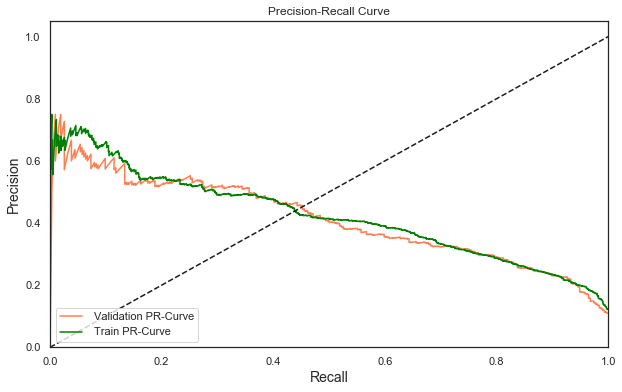

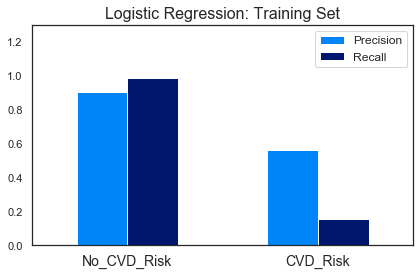

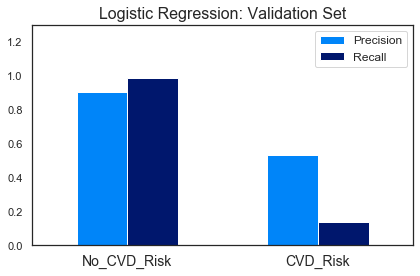

In [27]:
lr=LogisticRegression()
model_fit(lr, X_train, X_val, y_train, y_val, True)
plot_results(y_train,lr.predict(X_train),'Logistic Regression: Training Set',schema='a')
plot_results(y_val,lr.predict(X_val),'Logistic Regression: Validation Set',schema='a')

Model report on training data:
Train: Precision: 0.8824
Train: Recall : 0.1077
Average Precision (Train): 0.6657
Train Accuracy: 0.8983

Model report on validation data:
Test: Precision: 0.5435
Test: Recall : 0.0796
Average Precision (Validation): 0.3800
Validation Accuracy: 0.8930


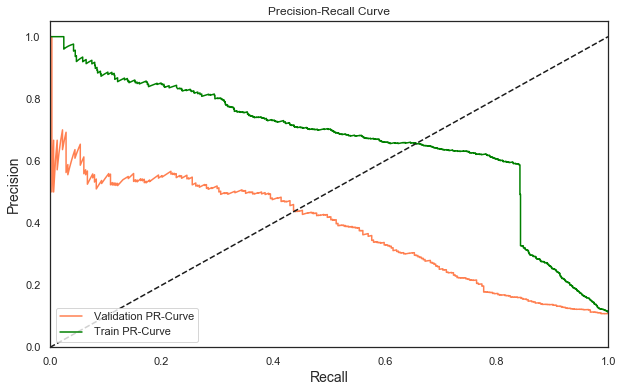

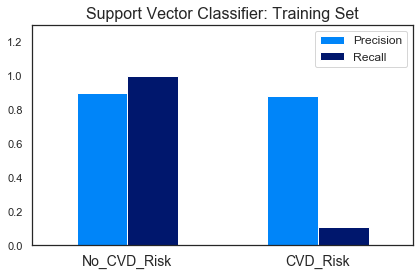

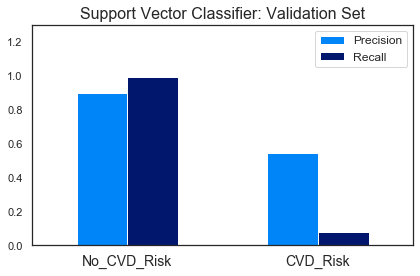

In [28]:
from sklearn.svm import SVC   
svc = SVC(probability=True)  
model_fit(svc,X_train, X_val, y_train, y_val, True)
plot_results(y_train,svc.predict(X_train),'Support Vector Classifier: Training Set',schema='a')
plot_results(y_val,svc.predict(X_val),'Support Vector Classifier: Validation Set',schema='a')

Model report on training data:
Train: Precision: 1.0000
Train: Recall : 1.0000
Average Precision (Train): 1.0000
Train Accuracy: 1.0000

Model report on validation data:
Test: Precision: 0.5632
Test: Recall : 0.1561
Average Precision (Validation): 0.4116
Validation Accuracy: 0.8954


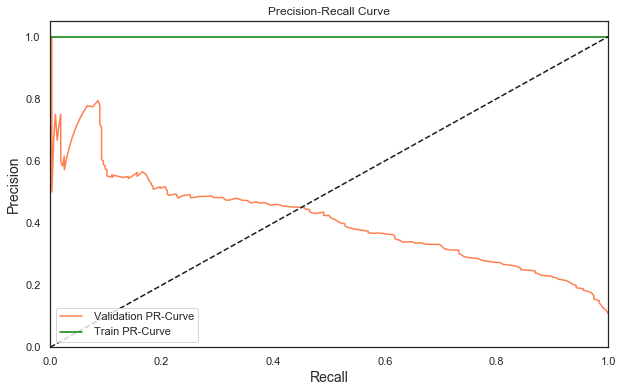

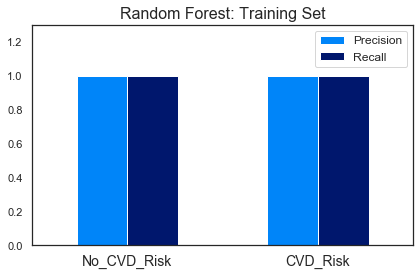

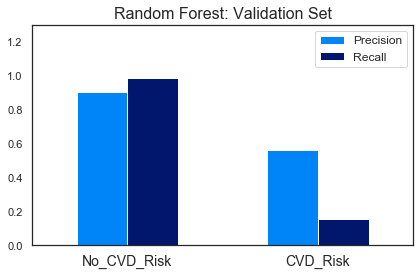

In [29]:
rf = RandomForestClassifier(n_estimators = 300)
model_fit(rf,X_train, X_val, y_train, y_val, True)
plot_results(y_train,rf.predict(X_train),'Random Forest: Training Set',schema='a')
plot_results(y_val,rf.predict(X_val),'Random Forest: Validation Set',schema='a')

Model report on training data:
Train: Precision: 0.7047
Train: Recall : 0.2913
Average Precision (Train): 0.5265
Train Accuracy: 0.9068

Model report on validation data:
Test: Precision: 0.5043
Test: Recall : 0.1847
Average Precision (Validation): 0.2986
Validation Accuracy: 0.8920


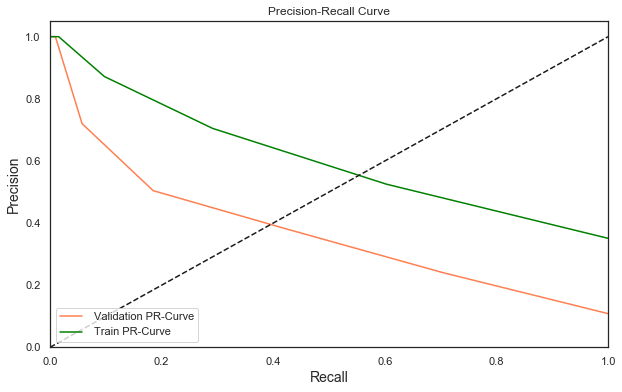

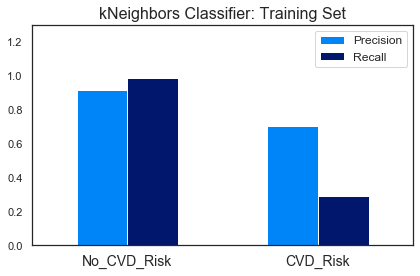

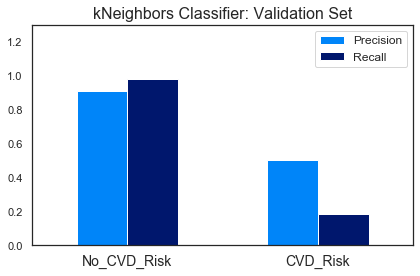

In [30]:
knn = KNeighborsClassifier()
model_fit(knn, X_train, X_val, y_train, y_val, True)
plot_results(y_train,knn.predict(X_train),'kNeighbors Classifier: Training Set',schema='a')
plot_results(y_val,knn.predict(X_val),'kNeighbors Classifier: Validation Set',schema='a')

In [31]:
def confusion_matrix_plot(model):
    y_pred = model.predict(X_val)
    model_matrix = confusion_matrix(y_val,y_pred)
    from mlxtend.plotting import plot_confusion_matrix
    import matplotlib.pyplot as plt
    fig, ax = plot_confusion_matrix(conf_mat=model_matrix)
    plt.show()

In [32]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
def show_metrics(X_tr, y_tr):
    MLA = [lr, knn, rf, svc]
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    row_index = 0
    for alg in MLA:
        pred = alg.fit(X_tr, y_tr).predict(X_val)
        pred_prob = alg.predict_proba(X_val)
        fp, tp, th = roc_curve(y_val, pred)     
        y_score = pred_prob[:,1]
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy'] = accuracy_score(y_val, pred)
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_val, pred)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_val, pred)
        MLA_compare.loc[row_index, 'F-1 score'] = f1_score(y_val, pred)
        MLA_compare.loc[row_index, 'ROC_AUC'] = auc(fp, tp)
        
        alg_precision, alg_recall, alg_thresholds = precision_recall_curve(y_val, y_score)
        MLA_compare.loc[row_index, 'PRC_AUC'] = auc(alg_recall, alg_precision)
        
        plt.step(alg_recall, alg_precision, marker='.', markersize=1, alpha=0.5, label=MLA_name)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        
        row_index+=1
        
    return(MLA_compare)    

,MLA Name,Accuracy,Precision,Recall,F-1 score,ROC_AUC,PRC_AUC
0,LogisticRegression,0.893375,0.531646,0.133758,0.213740,0.559720,0.411065
1,KNeighborsClassifier,0.891994,0.504348,0.184713,0.270396,0.581327,0.373097
2,RandomForestClassifier,0.894410,0.543478,0.159236,0.246305,0.571491,0.407149
3,SVC,0.893030,0.543478,0.079618,0.138889,0.535745,0.377758


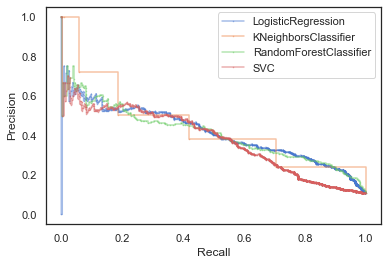

In [33]:
show_metrics(X_train, y_train)

In [34]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
ros = RandomOverSampler()
rus = RandomUnderSampler()
smote = SMOTE()
smoteenn = SMOTEENN()
columns = X_train.columns

In [35]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNeighbors Classifier', KNeighborsClassifier()))
models.append(('RandomForest Classifier', RandomForestClassifier()))
models.append(('Support Vector Classifier', SVC(probability=True)))

In [36]:
def resamp_eval(resamp_alg, X_tr, y_tr):
    names = []
    for name, model in models:
        names.append(name)
        print(name)
        model_fit(model, X_tr, X_val, y_tr, y_val, True)

In [37]:
os_X, os_y = ros.fit_sample(X_train, y_train)
os_X = pd.DataFrame(data=os_X, columns=columns )
os_y = pd.DataFrame(data=os_y, columns=['CVD_risk'])

Logistic Regression
Model report on training data:
Train: Precision: 0.7623
Train: Recall : 0.8090
Average Precision (Train): 0.8312
Train Accuracy: 0.7784

Model report on validation data:
Test: Precision: 0.2800
Test: Recall : 0.8089
Average Precision (Validation): 0.4021
Validation Accuracy: 0.7540


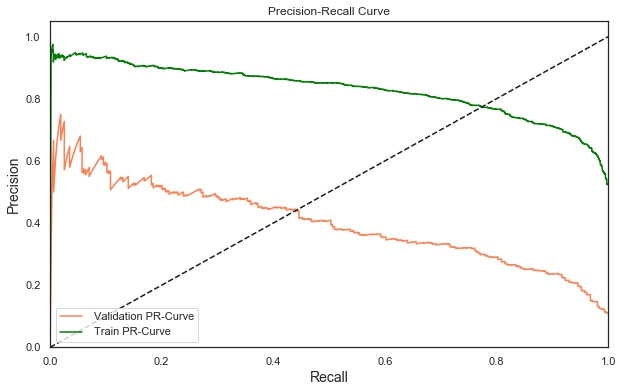

KNeighbors Classifier
Model report on training data:
Train: Precision: 0.8761
Train: Recall : 0.9987
Average Precision (Train): 0.9977
Train Accuracy: 0.9287

Model report on validation data:
Test: Precision: 0.2749
Test: Recall : 0.5796
Average Precision (Validation): 0.2440
Validation Accuracy: 0.7888


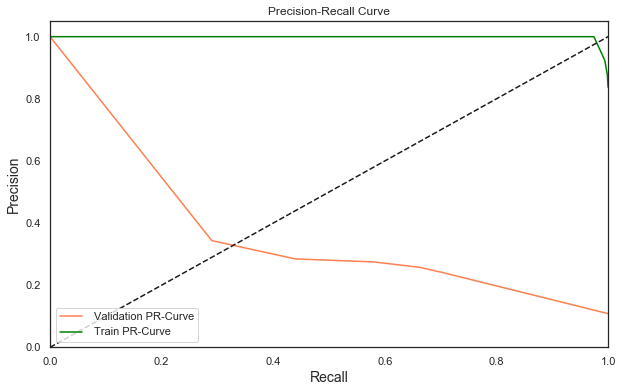

RandomForest Classifier
Model report on training data:
Train: Precision: 1.0000
Train: Recall : 1.0000
Average Precision (Train): 1.0000
Train Accuracy: 1.0000

Model report on validation data:
Test: Precision: 0.5101
Test: Recall : 0.2420
Average Precision (Validation): 0.4099
Validation Accuracy: 0.8927


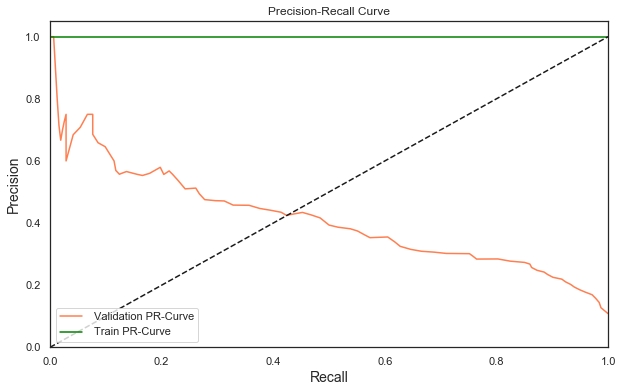

Support Vector Classifier
Model report on training data:
Train: Precision: 0.8343
Train: Recall : 0.9176
Average Precision (Train): 0.9090
Train Accuracy: 0.8676

Model report on validation data:
Test: Precision: 0.2933
Test: Recall : 0.7229
Average Precision (Validation): 0.3645
Validation Accuracy: 0.7812


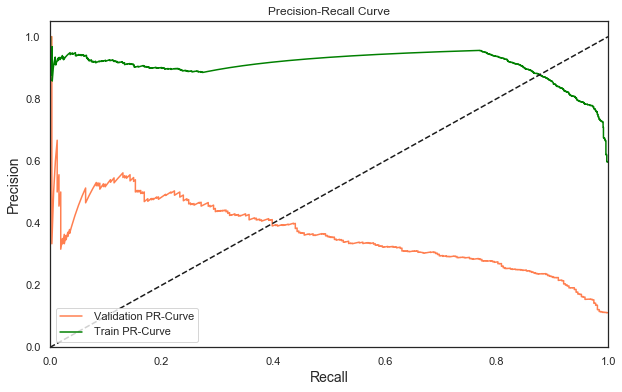

In [38]:
resamp_eval(ros, os_X, os_y)

,MLA Name,Accuracy,Precision,Recall,F-1 score,ROC_AUC,PRC_AUC
0,LogisticRegression,0.753968,0.280044,0.808917,0.416052,0.778104,0.399134
1,KNeighborsClassifier,0.788820,0.274924,0.579618,0.372951,0.696930,0.364862
2,RandomForestClassifier,0.891649,0.500000,0.232484,0.317391,0.602117,0.404846
3,SVC,0.781228,0.293282,0.722930,0.417279,0.755621,0.362305


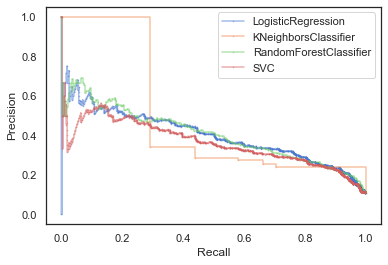

In [39]:
show_metrics(os_X, os_y)

In [40]:
us_X, us_y = rus.fit_sample(X_train, y_train)
us_X = pd.DataFrame(data=us_X, columns=columns )
us_y = pd.DataFrame(data=us_y, columns=['CVD_risk'])

Logistic Regression
Model report on training data:
Train: Precision: 0.7505
Train: Recall : 0.8082
Average Precision (Train): 0.8285
Train Accuracy: 0.7697

Model report on validation data:
Test: Precision: 0.2759
Test: Recall : 0.8057
Average Precision (Validation): 0.4067
Validation Accuracy: 0.7498


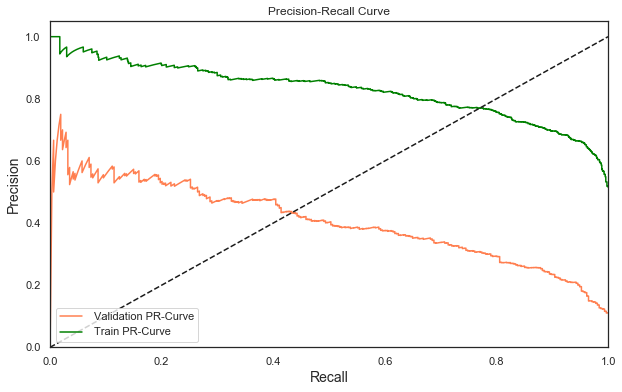

KNeighbors Classifier
Model report on training data:
Train: Precision: 0.8137
Train: Recall : 0.8021
Average Precision (Train): 0.8600
Train Accuracy: 0.8092

Model report on validation data:
Test: Precision: 0.2621
Test: Recall : 0.7389
Average Precision (Validation): 0.3067
Validation Accuracy: 0.7464


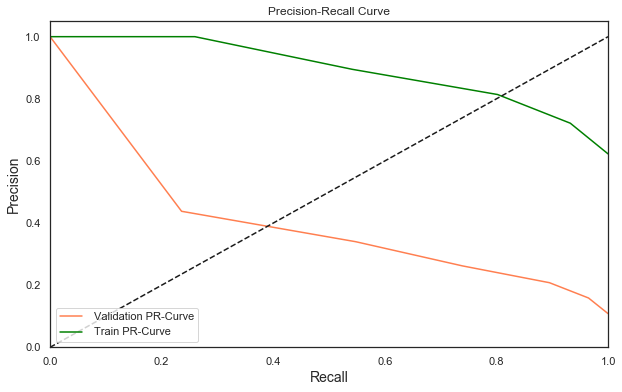

RandomForest Classifier
Model report on training data:
Train: Precision: 1.0000
Train: Recall : 1.0000
Average Precision (Train): 1.0000
Train Accuracy: 1.0000

Model report on validation data:
Test: Precision: 0.2660
Test: Recall : 0.8057
Average Precision (Validation): 0.3727
Validation Accuracy: 0.7381


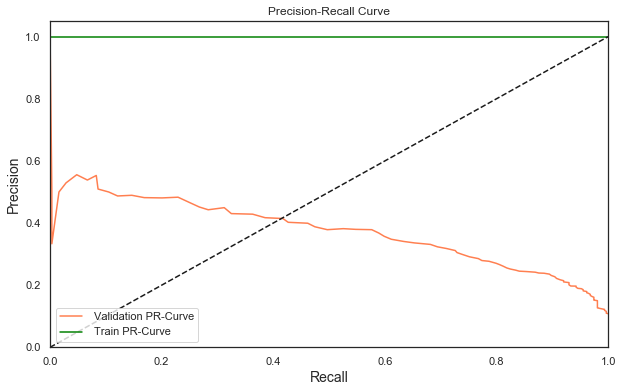

Support Vector Classifier
Model report on training data:
Train: Precision: 0.7796
Train: Recall : 0.8636
Average Precision (Train): 0.8969
Train Accuracy: 0.8097

Model report on validation data:
Test: Precision: 0.2641
Test: Recall : 0.8185
Average Precision (Validation): 0.3827
Validation Accuracy: 0.7333


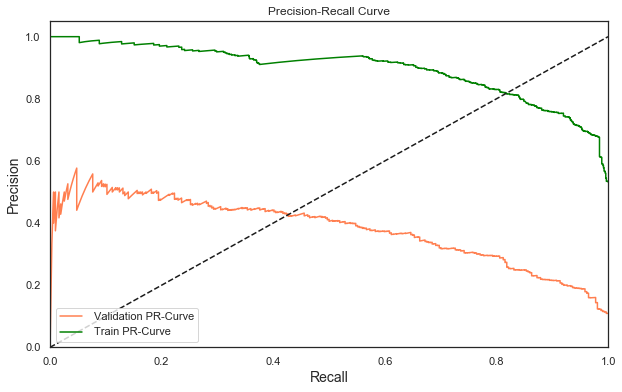

In [41]:
resamp_eval(rus, us_X, us_y)

,MLA Name,Accuracy,Precision,Recall,F-1 score,ROC_AUC,PRC_AUC
0,LogisticRegression,0.749827,0.275900,0.805732,0.411048,0.774383,0.403758
1,KNeighborsClassifier,0.746377,0.262147,0.738854,0.386989,0.743072,0.402536
2,RandomForestClassifier,0.743961,0.271368,0.808917,0.406400,0.772493,0.387046
3,SVC,0.733264,0.264132,0.818471,0.399378,0.770691,0.379959


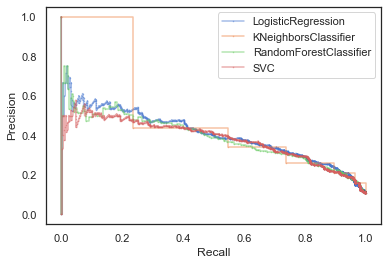

In [42]:
show_metrics(us_X, us_y)

In [43]:
smote_X, smote_y = smote.fit_sample(X_train, y_train)
smote_X = pd.DataFrame(data=smote_X, columns=columns )
smote_y = pd.DataFrame(data=smote_y, columns=['CVD_risk'])

Logistic Regression
Model report on training data:
Train: Precision: 0.8629
Train: Recall : 0.8700
Average Precision (Train): 0.9416
Train Accuracy: 0.8659

Model report on validation data:
Test: Precision: 0.3290
Test: Recall : 0.5605
Average Precision (Validation): 0.3854
Validation Accuracy: 0.8285


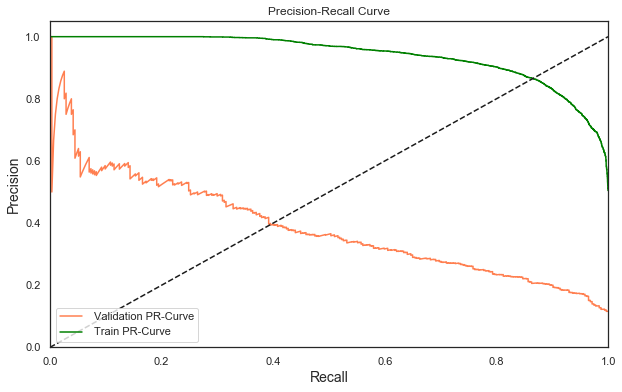

KNeighbors Classifier
Model report on training data:
Train: Precision: 0.8531
Train: Recall : 0.9982
Average Precision (Train): 0.9946
Train Accuracy: 0.9131

Model report on validation data:
Test: Precision: 0.2660
Test: Recall : 0.6497
Average Precision (Validation): 0.2784
Validation Accuracy: 0.7678


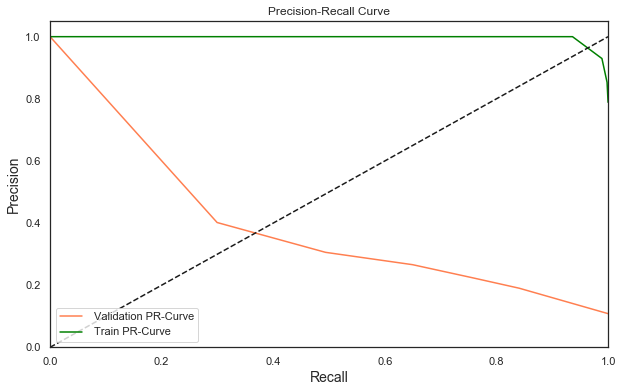

RandomForest Classifier
Model report on training data:
Train: Precision: 1.0000
Train: Recall : 1.0000
Average Precision (Train): 1.0000
Train Accuracy: 1.0000

Model report on validation data:
Test: Precision: 0.3972
Test: Recall : 0.4490
Average Precision (Validation): 0.3535
Validation Accuracy: 0.8665


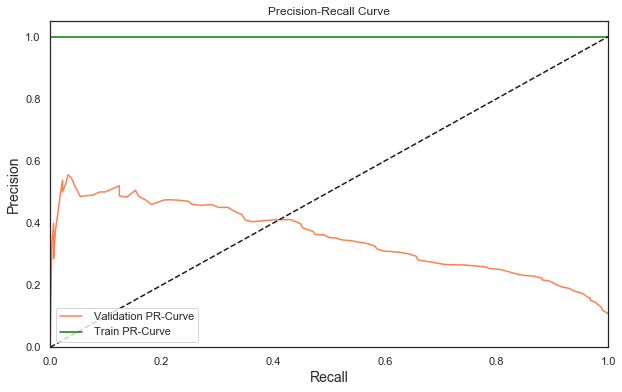

Support Vector Classifier
Model report on training data:
Train: Precision: 0.9098
Train: Recall : 0.9123
Average Precision (Train): 0.9718
Train Accuracy: 0.9109

Model report on validation data:
Test: Precision: 0.3667
Test: Recall : 0.4904
Average Precision (Validation): 0.3588
Validation Accuracy: 0.8530


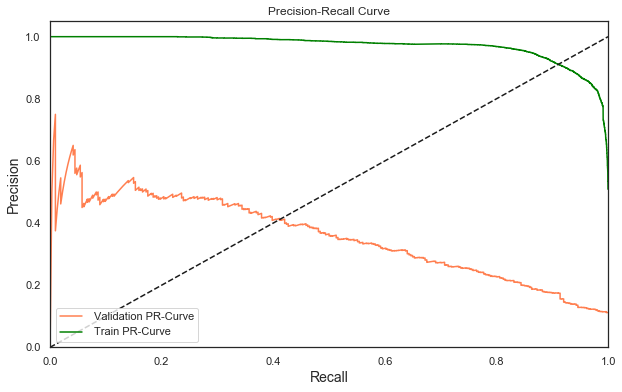

In [44]:
resamp_eval(smote, smote_X, smote_y)

,MLA Name,Accuracy,Precision,Recall,F-1 score,ROC_AUC,PRC_AUC
0,LogisticRegression,0.828502,0.328972,0.560510,0.414605,0.710789,0.383428
1,KNeighborsClassifier,0.767771,0.265971,0.649682,0.377428,0.715901,0.390527
2,RandomForestClassifier,0.867840,0.402817,0.455414,0.427504,0.686685,0.354082
3,SVC,0.853002,0.366667,0.490446,0.419619,0.693752,0.355857


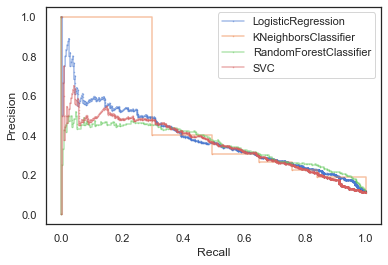

In [45]:
show_metrics(smote_X, smote_y)

In [46]:
smoteenn_X, smoteenn_y = smoteenn.fit_sample(X_train, y_train)
smoteenn_X = pd.DataFrame(data=smoteenn_X, columns=columns )
smoteenn_y = pd.DataFrame(data=smoteenn_y, columns=['CVD_risk'])

Logistic Regression
Model report on training data:
Train: Precision: 0.9352
Train: Recall : 0.9363
Average Precision (Train): 0.9824
Train Accuracy: 0.9246

Model report on validation data:
Test: Precision: 0.2743
Test: Recall : 0.7739
Average Precision (Validation): 0.3992
Validation Accuracy: 0.7536


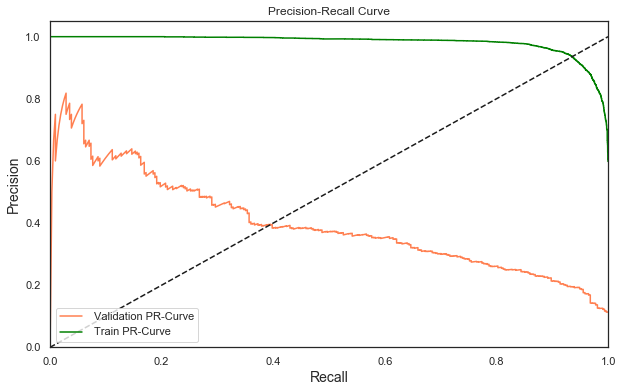

KNeighbors Classifier
Model report on training data:
Train: Precision: 0.9690
Train: Recall : 0.9999
Average Precision (Train): 0.9998
Train Accuracy: 0.9812

Model report on validation data:
Test: Precision: 0.2256
Test: Recall : 0.7803
Average Precision (Validation): 0.2525
Validation Accuracy: 0.6860


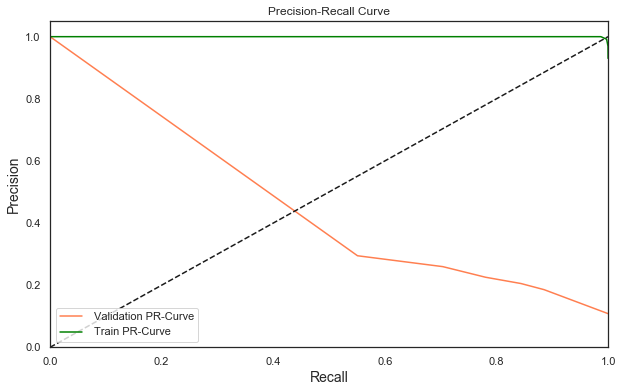

RandomForest Classifier
Model report on training data:
Train: Precision: 1.0000
Train: Recall : 1.0000
Average Precision (Train): 1.0000
Train Accuracy: 1.0000

Model report on validation data:
Test: Precision: 0.2803
Test: Recall : 0.7070
Average Precision (Validation): 0.3649
Validation Accuracy: 0.7716


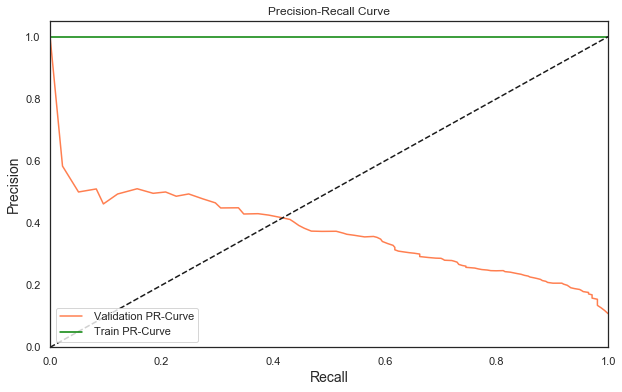

Support Vector Classifier
Model report on training data:
Train: Precision: 0.9640
Train: Recall : 0.9663
Average Precision (Train): 0.9937
Train Accuracy: 0.9590

Model report on validation data:
Test: Precision: 0.2804
Test: Recall : 0.7261
Average Precision (Validation): 0.3783
Validation Accuracy: 0.7685


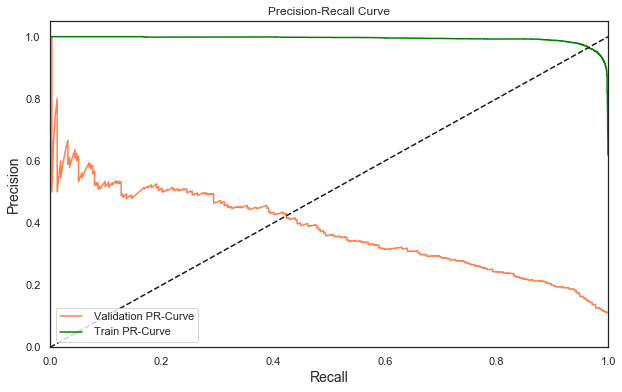

In [47]:
resamp_eval(smoteenn, smoteenn_X, smoteenn_y)

,MLA Name,Accuracy,Precision,Recall,F-1 score,ROC_AUC,PRC_AUC
0,LogisticRegression,0.753623,0.274266,0.773885,0.405000,0.762523,0.396434
1,KNeighborsClassifier,0.685990,0.225599,0.780255,0.350000,0.727395,0.456250
2,RandomForestClassifier,0.767081,0.275218,0.703822,0.395703,0.739295,0.367908
3,SVC,0.768461,0.280443,0.726115,0.404614,0.749861,0.376162


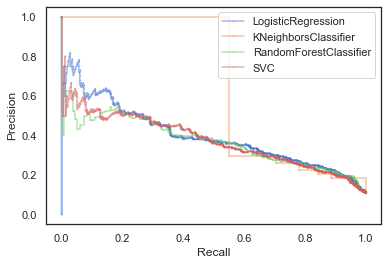

In [48]:
show_metrics(smoteenn_X, smoteenn_y)

In [49]:
def resample_plots(X_sam, y_sam, label):
    pred_sam = model.fit(X_sam, y_sam).predict_proba(X_val)
    y_score_sam = pred_sam[:,1]
    model_precision_sam, model_recall_sam, _ = precision_recall_curve(y_val, y_score_sam)
    plt.step(model_recall_sam, model_precision_sam, marker='.', label=label)      
    plt.xlabel('Recall')
    plt.ylabel('Precision') 
    plt.legend()
    plt.tight_layout()

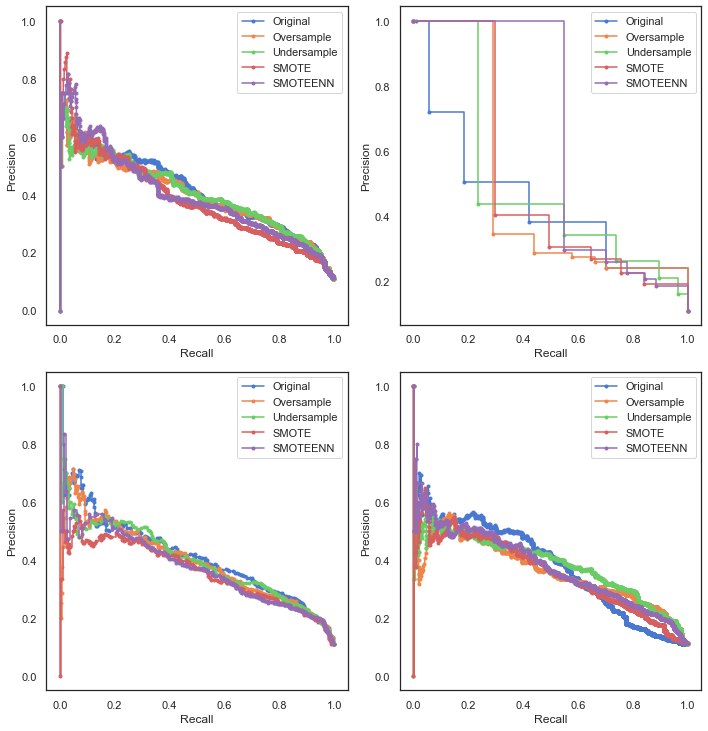

In [50]:
plt.subplots(figsize=(10,20))

MLA = (lr, knn, rf, svc)
model_name = ('LR', 'KNN', 'RF', 'SVC')

for i, model in enumerate(MLA):
    plt.subplot(len(MLA),2,i+1)
    resample_plots(X_train, y_train, 'Original')
    resample_plots(os_X, os_y, 'Oversample')
    resample_plots(us_X, us_y, 'Undersample')
    resample_plots(smote_X, smote_y, 'SMOTE')
    resample_plots(smoteenn_X, smoteenn_y, 'SMOTEENN')

In [51]:
def hyp_tuning(model, params, X_tr, y_tr):
    
    if model == lr:
        params = {'C':[.001,.01,.1,1,10,100]}
    elif model == gnb: 
        params = {'priors':[[0.1,0.9],[0.2,0.8],[0.3,0.7],[0.4,0.6],[0.5,0.5],[0.6,0.4]],
                'var_smoothing': np.logspace(0,-9, num=100)}
    elif model == knn:
        params = {'n_neighbors':list(range(1,25))}
    elif model == rf:
        params = {'criterion': ['entropy','gini'], 'max_features': ['auto', 'sqrt'],
                 'n_estimators': [100, 200, 300, 400], 'max_depth':[3, 5, 7]}
    elif model == gb:
        params = {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200, 300],
                 'max_depth': [1,3], 'max_features': ['log2', 'sqrt']}
    elif model == xgb:
        params = {"learning_rate": [0.01, 0.10, 0.5], "max_depth": [3, 5, 7], "min_child_weight": [1, 3, 5],
                 "gamma": [0.4, 0.5], "colsample_bytree" : [0.3, 0.5, 0.7]}
        
    cv = GridSearchCV(model, params, cv=5, scoring='recall')

    # Fit to the training set
    cv.fit(X_tr, y_tr)

    # Predict our test data
    y_pred = cv.predict(X_val)

    # Compute and print metrics
    print(classification_report(y_val, y_pred))
    print("Tuned Model Parameters: {}".format(cv.best_params_))
    print("\nConfusion Matrix: \n", confusion_matrix(y_val, y_pred))

In [52]:
X_te.head()

,gender,age,sysbp,diabp,bmi,hdl,trigly,ldl,pulse_cat,waistcircum_cat,...,age_cat_60s,age_cat_70s & above,ethnicity_cat_Black,ethnicity_cat_Hispanic,ethnicity_cat_Mexican,ethnicity_cat_Other,ethnicity_cat_White,income_cat_lower middle,income_cat_lowest,income_cat_middle & over
4449,1,77,170,74,20.09,50,164,132,0,0,...,0,1,0,0,0,0,1,0,1,0
411,1,28,112,78,18.17,93,56,90,0,0,...,0,0,1,0,0,0,0,1,0,0
10237,1,35,118,66,35.80,52,69,114,0,0,...,0,0,0,0,0,0,1,1,0,0
6028,0,65,150,76,19.56,39,199,131,0,1,...,1,0,0,0,0,1,0,1,0,0
6448,0,21,120,46,25.60,43,325,89,0,1,...,0,0,0,0,1,0,0,0,1,0


In [53]:
model_compare = pd.DataFrame(columns=['Model', 'Sampling', 'Precision', 'Recall', 'PRC_AUC', 'ROC_AUC'])
model_compare

,Model,Sampling,Precision,Recall,PRC_AUC,ROC_AUC


In [54]:
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.pipeline import Pipeline

In [55]:
steps = [('selectkbest', SelectKBest(f_classif)),('ros',RandomOverSampler()),
         ('LR', LogisticRegression())]

pipeline = Pipeline(steps)

k = [k+1 for k in range(len(X_train.columns))]
params = [{'LR__C':[.001,.01,.1,1,10,100], 'selectkbest__k': k}]

lros_cv = GridSearchCV(pipeline, params, cv=5, scoring='recall')

lros_cv.fit(X_train, y_train)\

y_pred = lros_cv.predict(X_val)

y_predprob = lros_cv.predict_proba(X_val)[:,1]

print(classification_report(y_val, y_pred))
print("Tuned Model Parameters: {}".format(lros_cv.best_params_))
print("\nConfusion Matrix: \n", confusion_matrix(y_val, y_pred))
print('')
print('Precision: %.4f' %(precision_score(y_val, y_pred)))
print('Recall: %.4f' %(recall_score(y_val, y_pred)))
print('')
precision, recall, thresholds = precision_recall_curve(y_val, y_predprob)

print('Area under PRC: %.4f'%(auc(recall, precision)))

fp, tp, th = roc_curve(y_val, y_pred)
print('Area under ROC: %.4f'%(auc(fp, tp)))

model_compare = model_compare.append({'Model': 'Logistic Regression',
                                      'Sampling': 'Oversampled',
                                      'Precision': precision_score(y_val, y_pred),
                                      'Recall': recall_score(y_val, y_pred),
                                      'PRC_AUC': auc(recall, precision),
                                      'ROC_AUC': auc(fp, tp)},
                                     ignore_index=True)

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      2584
           1       0.28      0.81      0.42       314

    accuracy                           0.76      2898
   macro avg       0.63      0.78      0.63      2898
weighted avg       0.89      0.76      0.80      2898

Tuned Model Parameters: {'LR__C': 0.01, 'selectkbest__k': 14}

Confusion Matrix: 
 [[1937  647]
 [  61  253]]

Precision: 0.2811
Recall: 0.8057

Area under PRC: 0.3763
Area under ROC: 0.7777


In [56]:
steps = [('selectkbest', SelectKBest(f_classif)),('rus',RandomUnderSampler()),
         ('LR', LogisticRegression())]

pipeline = Pipeline(steps)

k = [k+1 for k in range(len(X_train.columns))]

params = [{'LR__C':[.001,.01,.1,1,10,100], 'selectkbest__k': k}]

lrus_cv = GridSearchCV(pipeline, params, cv=5, scoring='recall')

lrus_cv.fit(X_train, y_train)

y_pred = lrus_cv.predict(X_val)

y_predprob = lrus_cv.predict_proba(X_val)[:,1]

print(classification_report(y_val, y_pred))
print("Tuned Model Parameters: {}".format(lrus_cv.best_params_))
print("\nConfusion Matrix: \n", confusion_matrix(y_val, y_pred))
print('')
print('Precision: %.4f' %(precision_score(y_val, y_pred)))
print('Recall: %.4f' %(recall_score(y_val, y_pred)))
print('')
precision, recall, thresholds = precision_recall_curve(y_val, y_predprob)

print('Area under PRC: %.4f'%(auc(recall, precision)))

fp, tp, th = roc_curve(y_val, y_pred)
print('Area under ROC: %.4f'%(auc(fp, tp)))

model_compare = model_compare.append({'Model': 'Logistic Regression',
                                      'Sampling': 'Undersampled',
                                      'Precision': precision_score(y_val, y_pred),
                                      'Recall': recall_score(y_val, y_pred),
                                      'PRC_AUC': auc(recall, precision),
                                      'ROC_AUC': auc(fp, tp)},
                                     ignore_index=True)

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      2584
           1       0.28      0.80      0.41       314

    accuracy                           0.75      2898
   macro avg       0.62      0.77      0.63      2898
weighted avg       0.89      0.75      0.80      2898

Tuned Model Parameters: {'LR__C': 10, 'selectkbest__k': 12}

Confusion Matrix: 
 [[1925  659]
 [  62  252]]

Precision: 0.2766
Recall: 0.8025

Area under PRC: 0.3672
Area under ROC: 0.7738


In [57]:
steps = [('selectkbest', SelectKBest(f_classif)),('smoteenn',SMOTEENN()), ('KNN', KNeighborsClassifier())]

pipeline = Pipeline(steps)

k = [k+1 for k in range(len(X_train.columns))]

params = [{'selectkbest__k': k, 'KNN__n_neighbors': [45, 50, 55]}]

knnsmo_cv = GridSearchCV(pipeline, params, cv=2, scoring='recall')

knnsmo_cv.fit(X_train, y_train)

y_pred = knnsmo_cv.predict(X_val)

y_predprob = knnsmo_cv.predict_proba(X_val)[:,1]

print(classification_report(y_val, y_pred))
print("Tuned Model Parameters: {}".format(knnsmo_cv.best_params_))
print("\nConfusion Matrix: \n", confusion_matrix(y_val, y_pred))
print('')
print('Precision: %.4f' %(precision_score(y_val, y_pred)))
print('Recall: %.4f' %(recall_score(y_val, y_pred)))
print('')
precision, recall, thresholds = precision_recall_curve(y_val, y_predprob)

print('Area under PRC: %.4f'%(auc(recall, precision)))

fp, tp, th = roc_curve(y_val, y_pred)
print('Area under ROC: %.4f'%(auc(fp, tp)))

model_compare = model_compare.append({'Model': 'KNeighbors Classifier',
                                      'Sampling': 'SMOTEENN',
                                      'Precision': precision_score(y_val, y_pred),
                                      'Recall': recall_score(y_val, y_pred),
                                      'PRC_AUC': auc(recall, precision),
                                      'ROC_AUC': auc(fp, tp)},
                                     ignore_index=True)

              precision    recall  f1-score   support

           0       0.98      0.61      0.75      2584
           1       0.21      0.88      0.34       314

    accuracy                           0.64      2898
   macro avg       0.60      0.74      0.55      2898
weighted avg       0.89      0.64      0.71      2898

Tuned Model Parameters: {'KNN__n_neighbors': 45, 'selectkbest__k': 23}

Confusion Matrix: 
 [[1571 1013]
 [  38  276]]

Precision: 0.2141
Recall: 0.8790

Area under PRC: 0.4105
Area under ROC: 0.7435


In [58]:
steps = [('selectkbest', SelectKBest(f_classif)), ('ros',RandomOverSampler()), ('RF', RandomForestClassifier())]

pipeline = Pipeline(steps)

k = [k+1 for k in range(len(X_train.columns))]

params = [{'selectkbest__k': k, 'RF__n_estimators':[200]}]

rfos_cv = GridSearchCV(pipeline, params, cv=5, scoring='recall')

rfos_cv.fit(X_train, y_train)

y_pred = rfos_cv.predict(X_val)

y_predprob = rfos_cv.predict_proba(X_val)[:,1]

print(classification_report(y_val, y_pred))
print("Tuned Model Parameters: {}".format(rfos_cv.best_params_))
print("\nConfusion Matrix: \n", confusion_matrix(y_val, y_pred))
print('')
print('Precision: %.4f' %(precision_score(y_val, y_pred)))
print('Recall: %.4f' %(recall_score(y_val, y_pred)))
print('')
precision, recall, thresholds = precision_recall_curve(y_val, y_predprob)

print('Area under PRC: %.4f'%(auc(recall, precision)))

fp, tp, th = roc_curve(y_val, y_pred)
print('Area under ROC: %.4f'%(auc(fp, tp)))

model_compare = model_compare.append({'Model': 'Random Forest',
                                      'Sampling': 'Oversampled',
                                      'Precision': precision_score(y_val, y_pred),
                                      'Recall': recall_score(y_val, y_pred),
                                      'PRC_AUC': auc(recall, precision),
                                      'ROC_AUC': auc(fp, tp)},
                                     ignore_index=True)

              precision    recall  f1-score   support

           0       0.95      0.70      0.81      2584
           1       0.23      0.71      0.34       314

    accuracy                           0.70      2898
   macro avg       0.59      0.71      0.58      2898
weighted avg       0.87      0.70      0.76      2898

Tuned Model Parameters: {'RF__n_estimators': 200, 'selectkbest__k': 1}

Confusion Matrix: 
 [[1813  771]
 [  90  224]]

Precision: 0.2251
Recall: 0.7134

Area under PRC: 0.2615
Area under ROC: 0.7075


In [59]:
steps = [('selectkbest', SelectKBest(f_classif)), ('rus', RandomUnderSampler()),('SVC', SVC(probability=True))]

pipeline = Pipeline(steps)

k = [k+1 for k in range(len(X_train.columns))]

params = [{'selectkbest__k': k, 'SVC__C': [0.1, 0.01], 'SVC__kernel': ['linear', 'rbf']}]

svcus_cv = GridSearchCV(pipeline, params, cv=5, scoring='recall')

svcus_cv.fit(X_train, y_train)

y_pred = svcus_cv.predict(X_val)

y_predprob = svcus_cv.predict_proba(X_val)[:,1]

print(classification_report(y_val, y_pred))
print("Tuned Model Parameters: {}".format(svcus_cv.best_params_))
print("\nConfusion Matrix: \n", confusion_matrix(y_val, y_pred))
print('')
print('Precision: %.4f' %(precision_score(y_val, y_pred)))
print('Recall: %.4f' %(recall_score(y_val, y_pred)))
print('')
precision, recall, thresholds = precision_recall_curve(y_val, y_predprob)

print('Area under PRC: %.4f'%(auc(recall, precision)))

fp, tp, th = roc_curve(y_val, y_pred)
print('Area under ROC: %.4f'%(auc(fp, tp)))

model_compare = model_compare.append({'Model': 'Support Vector Classifier',
                                      'Sampling': 'Undersampled',
                                      'Precision': precision_score(y_val, y_pred),
                                      'Recall': recall_score(y_val, y_pred),
                                      'PRC_AUC': auc(recall, precision),
                                      'ROC_AUC': auc(fp, tp)},
                                     ignore_index=True)

              precision    recall  f1-score   support

           0       0.96      0.63      0.76      2584
           1       0.21      0.81      0.33       314

    accuracy                           0.65      2898
   macro avg       0.59      0.72      0.55      2898
weighted avg       0.88      0.65      0.71      2898

Tuned Model Parameters: {'SVC__C': 0.01, 'SVC__kernel': 'rbf', 'selectkbest__k': 6}

Confusion Matrix: 
 [[1618  966]
 [  59  255]]

Precision: 0.2088
Recall: 0.8121

Area under PRC: 0.2805
Area under ROC: 0.7191


In [60]:
model_compare.sort_values(by='Recall', ascending=False)

,Model,Sampling,Precision,Recall,PRC_AUC,ROC_AUC
2,KNeighbors Classifier,SMOTEENN,0.214119,0.878981,0.410527,0.743477
4,Support Vector Classifier,Undersampled,0.208845,0.812102,0.280460,0.719131
0,Logistic Regression,Oversampled,0.281111,0.805732,0.376294,0.777673
1,Logistic Regression,Undersampled,0.276619,0.802548,0.367178,0.773758
3,Random Forest,Oversampled,0.225126,0.713376,0.261475,0.707501


In [76]:
coef_os = lros_cv.best_estimator_.named_steps['LR'].coef_[0]
selected_os = lros_cv.best_estimator_.named_steps.selectkbest.get_support()

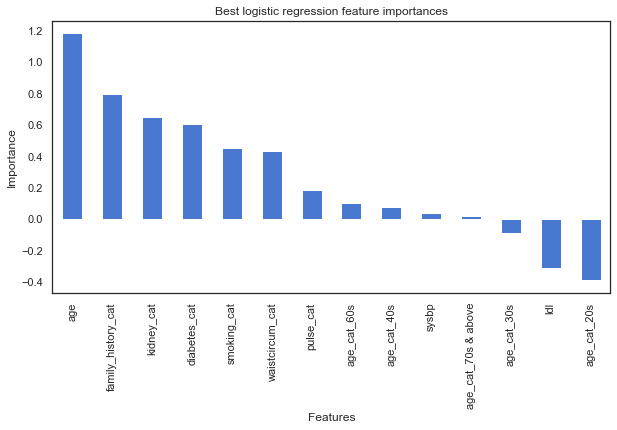

In [78]:
plt.subplots(figsize=(10, 5))
features = X_train.columns[selected_os]
imps = pd.Series(coef_os, index=features).sort_values(ascending=False)
imps.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Best logistic regression (oversampled) feature importances');

In [79]:
coef_us = lrus_cv.best_estimator_.named_steps['LR'].coef_[0]
selected_us = lrus_cv.best_estimator_.named_steps.selectkbest.get_support()

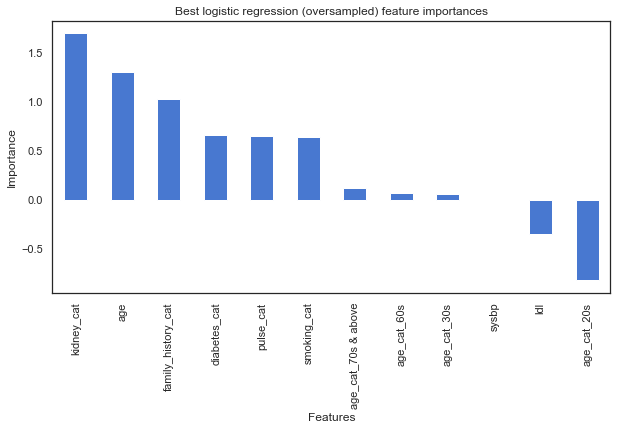

In [81]:
plt.subplots(figsize=(10, 5))
features = X_train.columns[selected_us]
imps = pd.Series(coef_us, index=features).sort_values(ascending=False)
imps.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Best logistic regression (oversampled) feature importances');

In [83]:
steps = [('selectkbest', SelectKBest(f_classif)),('ros',RandomOverSampler()),
         ('LR', LogisticRegression())]

pipeline = Pipeline(steps)

k = [k+1 for k in range(len(X_train.columns))]
params = [{'LR__C':[.001,.01,.1,1,10,100], 'selectkbest__k': k}]

lros_cv = GridSearchCV(pipeline, params, cv=5, scoring='recall')

X_train_1 = X_train[['age', 'family_history_cat', 'diabetes_cat', 'gender', 'smoking_cat']]
X_val_1 = X_val[['age', 'family_history_cat', 'diabetes_cat', 'gender', 'smoking_cat']]

lros_cv.fit(X_train_1, y_train)

y_pred = lros_cv.predict(X_val_1)

y_predprob = lros_cv.predict_proba(X_val_1)[:,1]

print(classification_report(y_val, y_pred))
print("Tuned Model Parameters: {}".format(lros_cv.best_params_))
print("\nConfusion Matrix: \n", confusion_matrix(y_val, y_pred))
print('')
print('Precision: %.4f' %(precision_score(y_val, y_pred)))
print('Recall: %.4f' %(recall_score(y_val, y_pred)))
print('')
precision, recall, thresholds = precision_recall_curve(y_val, y_predprob)

print('Area under PRC: %.4f'%(auc(recall, precision)))

fp, tp, th = roc_curve(y_val, y_pred)
print('Area under ROC: %.4f'%(auc(fp, tp)))

model_compare = model_compare.append({'Model': 'Logistic Regression',
                                      'Sampling': 'Oversampled',
                                      'Precision': precision_score(y_val, y_pred),
                                      'Recall': recall_score(y_val, y_pred),
                                      'PRC_AUC': auc(recall, precision),
                                      'ROC_AUC': auc(fp, tp)},
                                     ignore_index=True)

              precision    recall  f1-score   support

           0       0.96      0.71      0.81      2584
           1       0.24      0.77      0.37       314

    accuracy                           0.71      2898
   macro avg       0.60      0.74      0.59      2898
weighted avg       0.88      0.71      0.77      2898

Tuned Model Parameters: {'LR__C': 0.001, 'selectkbest__k': 5}

Confusion Matrix: 
 [[1826  758]
 [  72  242]]

Precision: 0.2420
Recall: 0.7707

Area under PRC: 0.3325
Area under ROC: 0.7387


In [90]:
steps = [('selectkbest', SelectKBest(f_classif)),('rus',RandomUnderSampler()),
         ('LR', LogisticRegression())]

pipeline = Pipeline(steps)

k = [k+1 for k in range(len(X_train.columns))]
params = [{'LR__C':[.001,.01,.1,1,10,100], 'selectkbest__k': k}]

lros_cv = GridSearchCV(pipeline, params, cv=5, scoring='recall')

X_train_2 = X_train[['age', 'family_history_cat', 'diabetes_cat', 'gender', 'smoking_cat']]
X_val_2 = X_val[['age', 'family_history_cat', 'diabetes_cat', 'gender', 'smoking_cat']]

lrus_cv.fit(X_train_1, y_train)

y_pred = lrus_cv.predict(X_val_2)

y_predprob = lrus_cv.predict_proba(X_val_2)[:,1]

print(classification_report(y_val, y_pred))
print("Tuned Model Parameters: {}".format(lrus_cv.best_params_))
print("\nConfusion Matrix: \n", confusion_matrix(y_val, y_pred))
print('')
print('Precision: %.4f' %(precision_score(y_val, y_pred)))
print('Recall: %.4f' %(recall_score(y_val, y_pred)))
print('')
precision, recall, thresholds = precision_recall_curve(y_val, y_predprob)

print('Area under PRC: %.4f'%(auc(recall, precision)))

fp, tp, th = roc_curve(y_val, y_pred)
print('Area under ROC: %.4f'%(auc(fp, tp)))

model_compare = model_compare.append({'Model': 'Logistic Regression',
                                      'Sampling': 'Oversampled',
                                      'Precision': precision_score(y_val, y_pred),
                                      'Recall': recall_score(y_val, y_pred),
                                      'PRC_AUC': auc(recall, precision),
                                      'ROC_AUC': auc(fp, tp)},
                                     ignore_index=True)

              precision    recall  f1-score   support

           0       0.96      0.69      0.80      2584
           1       0.23      0.79      0.36       314

    accuracy                           0.70      2898
   macro avg       0.60      0.74      0.58      2898
weighted avg       0.89      0.70      0.75      2898

Tuned Model Parameters: {'LR__C': 0.001, 'selectkbest__k': 5}

Confusion Matrix: 
 [[1773  811]
 [  66  248]]

Precision: 0.2342
Recall: 0.7898

Area under PRC: 0.3208
Area under ROC: 0.7380
